In [25]:
import pandas as pd
import geopandas as gpd

%matplotlib inline

## **Top 5 Neighborhoods in Arrest, Non-Traffic Citations, and Police-Incidents**

#### Arrest Data:

In [28]:
arrestData = pd.read_csv("Arrests.csv", index_col="_id")
topA5 = arrestData['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=False).head(5)
topA5

Central Business District    4250
South Side Flats             3382
Carrick                      2300
East Allegheny               2155
Homewood South               2047
Name: INCIDENTNEIGHBORHOOD, dtype: int64

#### Non-Traffic Citations Data:

In [3]:
citationData = pd.read_csv("non-traffic-citation-data.csv", index_col="_id")
topNT5 = citationData['NEIGHBORHOOD'].value_counts().sort_values(ascending=False).head(5)
topNT5

South Side Flats             3397
Central Business District    1995
Central Oakland               659
North Shore                   576
Carrick                       441
Name: NEIGHBORHOOD, dtype: int64

#### Police Incident Blotter Data:

In [11]:
incidentData = pd.read_csv("Police-Incident-Blotter.csv", index_col="_id")
topPI5 = incidentData['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=False).head(5)
topPI5

Central Business District    133
South Side Flats             103
Carrick                       47
Mount Washington              45
Squirrel Hill South           43
Name: INCIDENTNEIGHBORHOOD, dtype: int64

##### This data shows consistent overlap with the Central Business District and the South Side Flats being in the top 2 positions. Based on our metrics, this puts the Central Business District and the South Side Flats on top 2 for our "best" neighborhood.

##### Let's plot the top 3 neighborhoods for each metric:

#### Arrest Data:

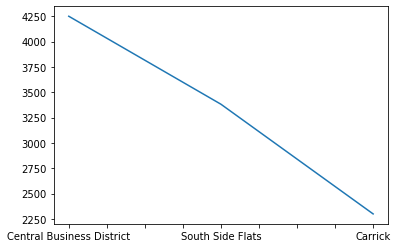

In [5]:
topA5.head(3).plot()

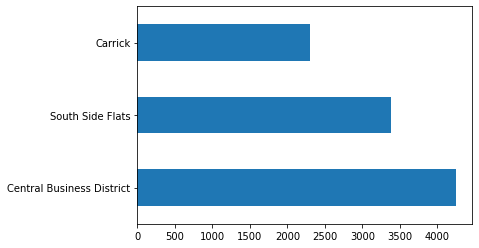

In [35]:
A5graph = topA5.head(3).plot.barh(x="Neighborhood", y= "# of Arrests")

#### Non-Traffic Citations Data:

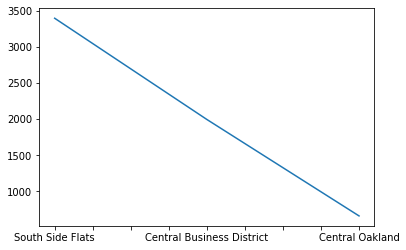

In [6]:
topNT5.head(3).plot()

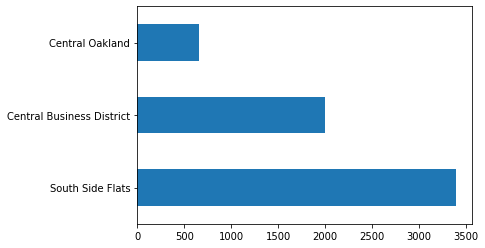

In [36]:
NT5graph = topNT5.head(3).plot.barh(x="Neighborhood", y= "# of Citations")

#### Police Incident Blotter Data:

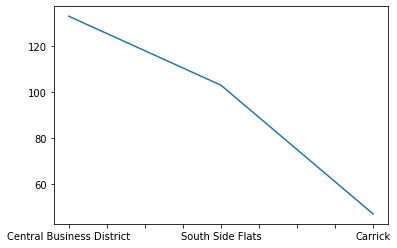

In [7]:
topPI5.head(3).plot()

##### These plots continue to prove that the Central Business District and South Side Flats are clearly in the lead compaired to the rest of the neighborhoods. They are both about double the neighborhood that is in 3rd place, so clearly our most dangerous "best" neighborhood will either be the Central Business District or the South Side Flats... lets do some more digging to choose which. 

#### Arrest Data:

Lets look more specifically at the offenses in both the Central Business District and the South Side Flats to evaluate which are worse. 

Let's analyze what the 10 most recent arrests were in the Central Business District. There was no main trend in the offences as there was a variety of types of arrests. Almost all the arrests had more than one charge. 5 of the offenses were related to theft or robbery. 3 of the offenses put others in direct danger/assault.

In [8]:
offenseCounter = 0
for index, row in arrestData.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] == "Central Business District":
        print(row["OFFENSES"])
        offenseCounter = offenseCounter + 1
    if offenseCounter == 10:
        break

3929 Retail Theft. / 3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION
3929 Retail Theft. / 3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION
901 Criminal Attempt / 2702 Aggravated Assault. / 2705 Recklessy Endangering Another Person. / 6106 Firearms not to be Carried without a License. / 6110.1 Possesion of Firearm by Minor
3929(a)(1) Retail Theft; takes possession of, carries away, or transfers displayed merchandise
3111 Obedience to Traffic-Control Devices. / 3802(a)(1) DUI - General Impairment
9015 Failure To Appear/Arrest on Attachment Order / 9501 Bench Warrant / 13(a)(31) Marijuana: Possession Small Amount
2702 Aggravated Assault. / 2706 Terroristic Threats. / 3304(a)(5) CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another
3502 Burglary.
5505 Public Drunkenness / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession
3921(a) Theft by Unlawful Taking or Disposition - Movable item


Now, let's analyze what the 10 most recent arrests were in the South Side Flats. There was no main trend in the offences as there was a variety of types of arrests. Almost all the arrests had more than one charge. 4 of the offenses were related to theft or robbery. 2 of the offenses put others in direct danger/assault. 2 of the offenses included drugs or alcohol.

In [9]:
offenseCounter = 0
for index, row in arrestData.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] == "South Side Flats":
        print(row["OFFENSES"])
        offenseCounter = offenseCounter +1
    if offenseCounter==10:
        break

6106 Firearms not to be Carried without a License. / 4303 General Lighting Requirements.
2701 Simple Assault.
3929(a)(1) Retail Theft; takes possession of, carries away, or transfers displayed merchandise
9015 Failure To Appear/Arrest on Attachment Order
3921(a) Theft by Unlawful Taking or Disposition - Movable item
9093 Indirect Criminal Contempt
5505 Public Drunkenness / 3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION
13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession
3925 Receiving Stolen Property. / 1543 Driving While Operating Privilege is Suspended or Revoked. / 3714 Careless Driving
3921 Theft by Unlawful Taking or Disposition. / 5505 Public Drunkenness / 13(a)(16) Possession of Controlled Substance


#### Non-Traffic Citations Data:

Lets look more specifically at the non-traffic citations in both the Central Business District and the South Side Flats to evaluate which are worse. 

Now, let's analyze the most recent 10 citations recieved in the Central Business District. It seems that the offense standing out the most is obstructing highways, railroads, or public passages.

In [10]:
offenseCounter = 0
for index, row in citationData.iterrows():
    if row["NEIGHBORHOOD"] == "Central Business District":
        print(row["OFFENSES"])
        offenseCounter = offenseCounter +1
    if offenseCounter==10:
        break

3929(a)(1) Retail Theft; takes possession of, carries away, or transfers displayed merchandise
601.08(a) Alcohol or Liquor Consumption on Streets or Sidewalks
5511(c)(1) CRUELTY TO ANIMALS
5505 Public Drunkenness
5505 Public Drunkenness
5507(a) Obstructing highway, railroad or public passage
5507(a) Obstructing highway, railroad or public passage
5507(a) Obstructing highway, railroad or public passage
2709(a)(1) Harassment by Physical Contact, or Attempts or Threats
602.04(b)(2) Aggressive Panhandling


Let's analyze the 10 most recent non-traffic citations written in the South Side Flats are. The most recurring offenses I see are related to being under the influence of alcohol and using the restroom publically (not in a bathroom).

In [11]:
offenseCounter = 0
for index, row in citationData.iterrows():
    if row["NEIGHBORHOOD"] == "South Side Flats":
        print(row["OFFENSES"])
        offenseCounter = offenseCounter +1
    if offenseCounter==10:
        break

3304(a)(5) CRIMINAL MISCHIEF - Intentionally Damages Real Or Personal Property Of Another
5505 Public Drunkenness
601.16(b)(1)(a) Any Person who urinates or defecates in, on, or about any public place
5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF
5505 Public Drunkenness
601.16(b)(1)(a) Any Person who urinates or defecates in, on, or about any public place
5505 Public Drunkenness
601.08 (a) Open Container Law
5503(a)(1) DISORDERLY CONDUCT - ENGAGE IN FIGHTING
601.16(b)(1)(a) Any Person who urinates or defecates in, on, or about any public place


#### Police Incident Blotter Data:

Lets look more specifically at the police incidents in both the Central Business District and the South Side Flats to evaluate which are worse. 

Let's take a look at the 10 most recent incidents that police were called to in the Central Business District. I don't see a common theme beetween these incidents. I do find that resisting law enforcemet, robbery/theft, and public drunkenness are larger incidents that stand out to me most. 

In [12]:
offenseCounter = 0
for index, row in incidentData.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] == "Central Business District":
        print(row["OFFENSES"])
        offenseCounter = offenseCounter +1
    if offenseCounter==10:
        break

3921(a) Theft by Unlawful Taking or Disposition - Movable item
9489 Found Property
9504 Lost Property
5104 Resisting Arrest or Other Law Enforcement. / 2709(a)(1) Harassment by Physical Contact, or Attempts or Threats
9999 9999 - (Misc. Incident): 
9501 Bench Warrant / 3703 Driving Upon Sidewalk.
9999 9999 - (Misc. Incident): Harassment
3701 Robbery.
5505 Public Drunkenness / 9998 Overdose Other
9994 PFA Service


These are the 10 most recent incidents that occured in the South Side Flats. A handful of the incidents seem to revolve around theft. 

In [13]:
offenseCounter = 0
for index, row in incidentData.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] == "South Side Flats":
        print(row["OFFENSES"])
        offenseCounter = offenseCounter +1
    if offenseCounter==10:
        break

9489 Found Property
3934 Theft from Vehicle / 3304 Criminal Mischief.
3701 Robbery. / 2702 Aggravated Assault. / 3921(a) Theft by Unlawful Taking or Disposition - Movable item / 3928 Unauthorized Use of Automobile and Other Vehicles.
3934 Theft from Vehicle / 7613(a) Computer Theft
3745 Accidents Involving Damage to Unattended Veh.or Prop.
3934 Theft from Vehicle
3934 Theft from Vehicle
13(a)(31) Marijuana: Possession Small Amount / 9501 Bench Warrant
5505 Public Drunkenness / 5503 Disorderly Conduct. / 3503(b.1) Criminal Trespass - Simple Trespasser
3934 Theft from Vehicle / 3304 Criminal Mischief.


#### Overall...

Based on our 3 metrics, arrests, non-traffic citations, and the police incident blotter, we have decided that the most dangerous and best neighborhood in Pittsburgh is the Central Business District!! 
Our arrests data and the police incident blotter both agreed that the Central Business District is the most dangerous neighborhood as it was the neighborhood with the most incidents and arrests. We also evaluated that the Central Business District was the most dangerous when we looked at the reasons for the offenses. It was clear that in the Central Business District the offenses were more serious and dangerous compaired to the other neighborhoods. 
When looking at Non-traffic citations, the Central Business District came in second place for most dangerous. Even though it was second, the cause of the citations were serious and dangerous, so we still chose this neighborhood over South Side Flats.
In conclusion, our data showed how the Central Business District is the most dangerous neighborhood; therefore, it is the best.

Liza's conclusion- After these observations, I find that the arrest written in the Central Business District are the most dangerous (8/10 fell under theft or assault). I also think that the non-traffic citations in the Central Business District were concerning as there was a lot of theft and public drunkenness. In addition, the police icident blotter also showed the Central Business District as the most dangerous. I have never been to the Central Business district, so ITherefore, I would say that the Central Business District is the best dangerous neighborhood to live in in Pittsburgh.

Hailey's conclusion- After analyzing all of the datasets, I have to say that the Central Business District was the most dangerous neighborhood in Pittsburgh (which, for us, means the best)! I found that the arrest dataset and the police incident dataset brought me to my conclusion the most. As I read through the incidents that brought a police presence and/or arrest, I personally felt that said incidents were the scariest within the Central Business District. Robbery/theft is something that I wouldn't have to worry about while relaxing at home. Also, the incidents relating to resisting police cause concern because it demonstrates the sort of people and personalities that I would be surrounding myself with. 
Not to mention the arrests that put other citizens in the position of being assulted/harassed. So with all of this in mind, there i